### RV-7 Lyc IO-360 - Exploratory Data Analysis

Copyright 2016-2019 by Savvy Aircraft Maintenance Management, Inc., all rights reserved. Use for any purpose by permission only.

The analysis below is based on data from Savvy's Report Card database table. Consequently, only flights of at least 40 minutes duration during which a cruise segment of at least 10 minutes could be identified are included.

In [213]:
%matplotlib inline
import sa_function_library as sa_fn
import sa_application_function_library as sa_ap
import sa_db_connection_library as sa_db
#import sa_report_card_function_library as sa_rc
#import sa_report_card_function_library_v2 as sa_rc_v2
import matplotlib.pyplot as plt
import datetime
#import prettyplotlib as ppl
#import brewer2mpl as b2mpl

In [4]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [6]:
import seaborn as sns
from scipy import stats, optimize

In [7]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",200)

In [16]:
# only do this when one of the modules has been revised
reload(sa_fn)
reload(sa_ap)
reload(sa_db)
reload(sa_rc)
reload(sa_rc_v2)

<module 'sa_report_card_function_library_v2' from 'sa_report_card_function_library_v2.pyc'>

In [8]:
#### Creates a cohort dataframe or aircraft dataframe from analyst_reportcarddata table

ac_id = 0 # leave 0 for cohort dataframe
amod_emod_tuple = (198, 116) # leave 0 for aircraft dataframe
#start_date_str =
end_date_str = datetime.datetime.now().strftime('%Y-%m-%d')
quantile_interval = 1
debug_flag = 0

amod_id = amod_emod_tuple[0]
emod_id = amod_emod_tuple[1]
#outlier_dict_dict = sa_rc_v2.unpickle_object_from_file("outlier_dict_dict.pic")
outlier_dict_dict = {}
#outlier_dict = outlier_dict_dict[amod_id]
outlier_dict = {}

flights_dataframe = sa_ap.rc_values_to_df(ac_id=0, \
                  amod_emod_tuple=amod_emod_tuple, \
                  outlier_dict=outlier_dict, \
                  start_date_str=0, \
                  end_date_str=end_date_str, \
                  quantile_interval=quantile_interval, \
                  debug_flag=debug_flag \
                             )




In [10]:
##### Save flights_dataframe to file
##### Specify cohort in filename!!!! e.g. "df_184_43.pic"

file_name = "df_198_116.pic"
#flights_dataframe.to_pickle("../data_files/" + file_name)
flights_dataframe.to_pickle(file_name)

In [11]:
##### Get flights_dataframe from file
##### Specify cohort in filename!!!! e.g. "df_184_43.pic"

file_name = "df_100_9.pic"
flights_dataframe = pd.read_pickle("../data_files/" + file_name)

In [11]:
dataframe = flights_dataframe
print len(dataframe.index)
print dataframe.columns.values

7597
['aircraft_id' 'date' 'duration' 'ff' 'flight_id' 'gnd_speed'
 'lean_status' 'max_cht_cr' 'max_cht_series_name_cr' 'max_cht_spread_cr'
 'max_cht_temperature' 'max_ff' 'max_map' 'max_rpm'
 'max_stable_interval_index' 'min_cht_series_name_cr'
 'min_stable_interval_index' 'mpg' 'oil_press_cr' 'oil_temp_cr'
 'pct_power' 'speed' 'stable_altitude' 'stable_duration_minutes' 'tas']


# max_cht_cr (maximum CHT in cruise)

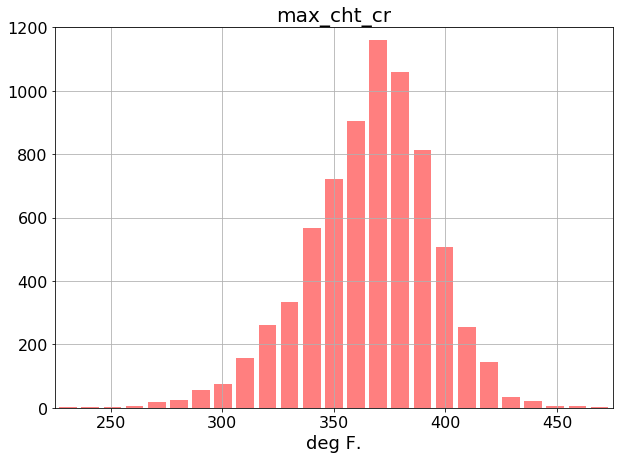

In [69]:
dataframe = flights_dataframe
#dataframe_101 = finished_dataframe_modified_101

# fill these in:
column_name_str = "max_cht_cr"
upper_limit = 475
lower_limit = 225

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
#print len(df.index)
#print file_name
#print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "deg F.",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 25,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 1200,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

# max_cht_temperature (maximum CHT during flight)

df_198_116.pic


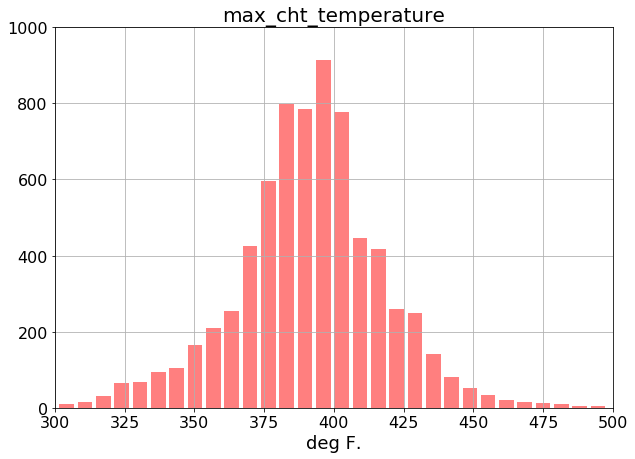

In [73]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "max_cht_temperature"
upper_limit = 500
lower_limit = 300
print file_name
cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
#print len(df.index)
#print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "deg F.",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 30,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 1000,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

## max_cht_spread_cr (CHT spread hottest to coldest at max CHT in cruise)

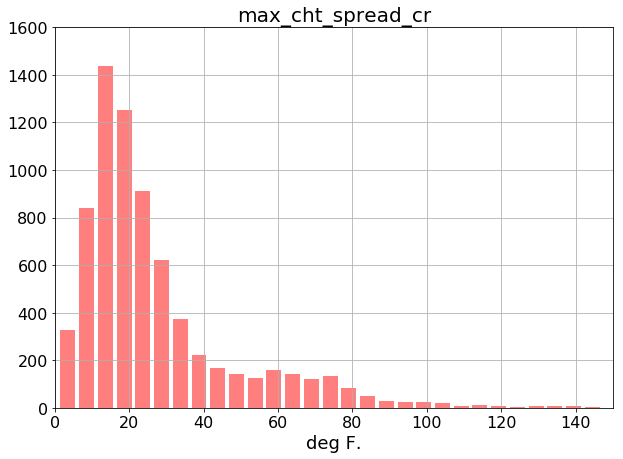

In [78]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "max_cht_spread_cr"
upper_limit = 150
lower_limit = 0
cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
#print len(df.index)
#print file_name
#print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "deg F.",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 29,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 1600,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

## tas (true airspeed in cruise)

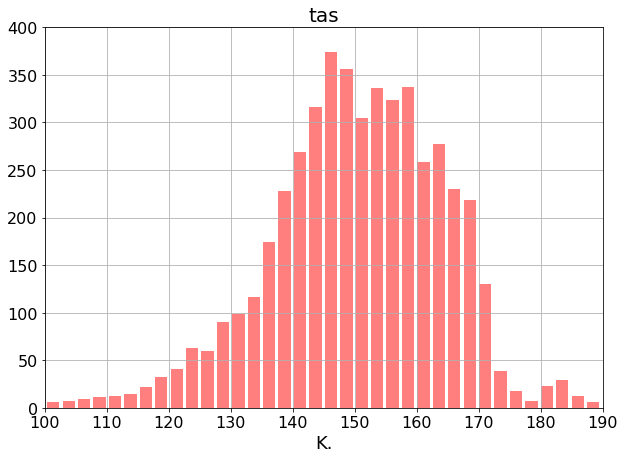

In [82]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "tas"
upper_limit = 190
lower_limit = 100

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
# print len(df.index)
# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "K.",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 36,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 400,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

## gnd_speed (ground speed in cruise)

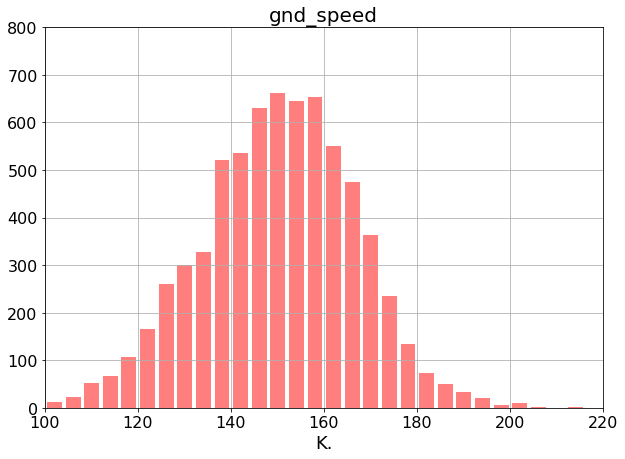

In [90]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "gnd_speed"
upper_limit = 220
lower_limit = 100

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
# print len(df.index)
# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "K.",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 29,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 800,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

## speed (in cruise, TAS if available, otherwise ground speed)

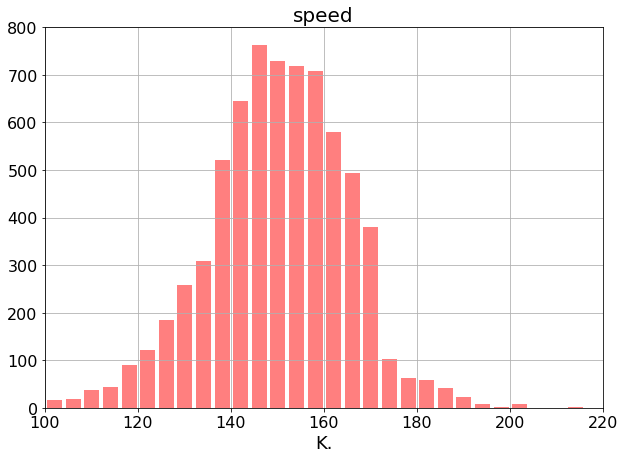

In [99]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "speed"
upper_limit = 220
lower_limit = 100

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
# print len(df.index)
# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "K.",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 29,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 800,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )


# stable_altitude (cruising altitude)

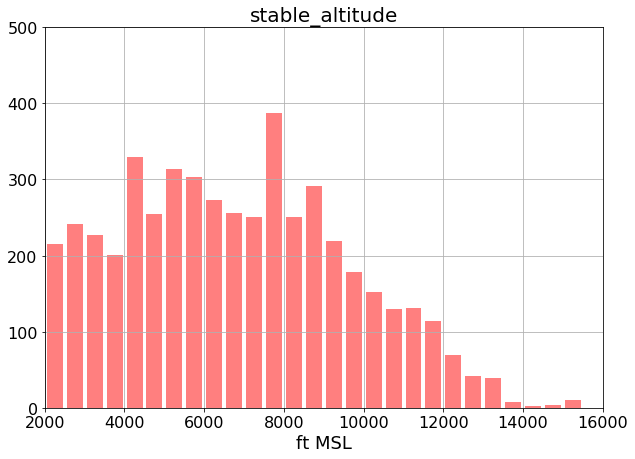

In [103]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "stable_altitude"
upper_limit = 16000
lower_limit = 2000

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
# print len(df.index)
# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "ft MSL",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 27,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 500,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

# mpg (miles per gallon in cruise)

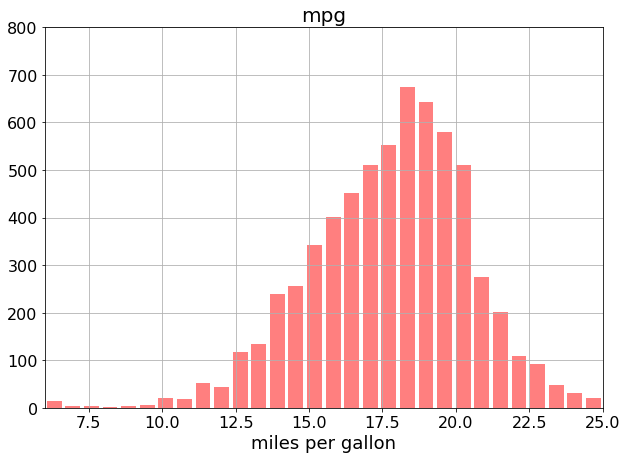

In [109]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "mpg"
upper_limit = 25
lower_limit = 6

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
# print len(df.index)
# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "miles per gallon",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 30,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 800,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

# pct_power (percent rated power in cruise)

lop 2282 rop 4224


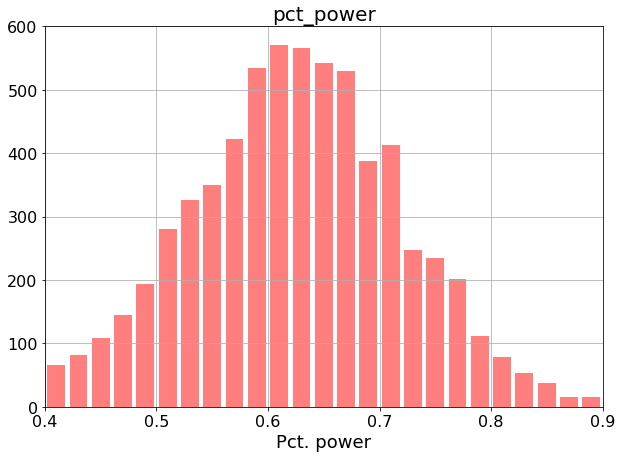

In [110]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "pct_power"
upper_limit = .9
lower_limit = .4

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]
print "lop", len(dataframe[(dataframe.lean_status == "lop") & cond1 & cond2].index), \
      "rop", len(dataframe[(dataframe.lean_status == "rop") & cond1 & cond2].index) 

# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "Pct. power",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 25,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 600,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

# oil_press_cr (oil pressure during cruise)

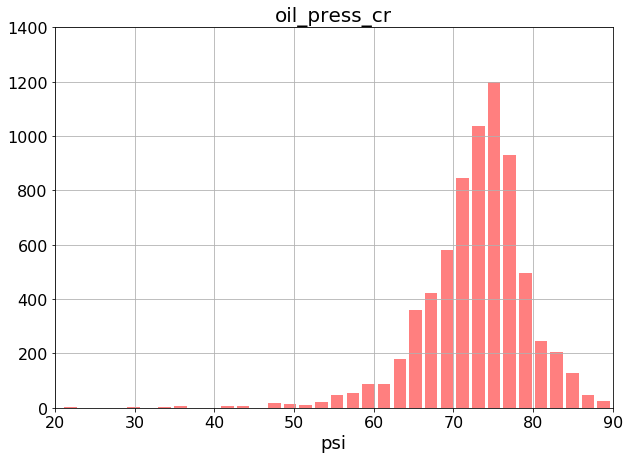

In [118]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "oil_press_cr"
upper_limit = 90
lower_limit = 20

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]

# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "psi",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 35,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 1400,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

# oil_temp_cr (oil temp in cruise)

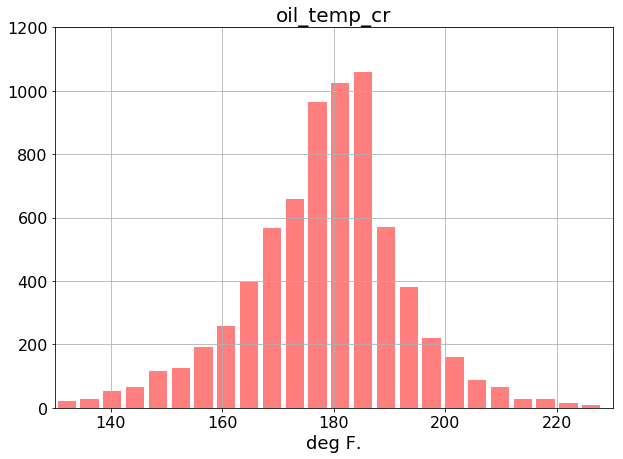

In [123]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "oil_temp_cr"
upper_limit = 230
lower_limit = 130

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]

# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "deg F.",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 24,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 1200,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

# stable_duration_minutes (duration of cruise segment in minutes)

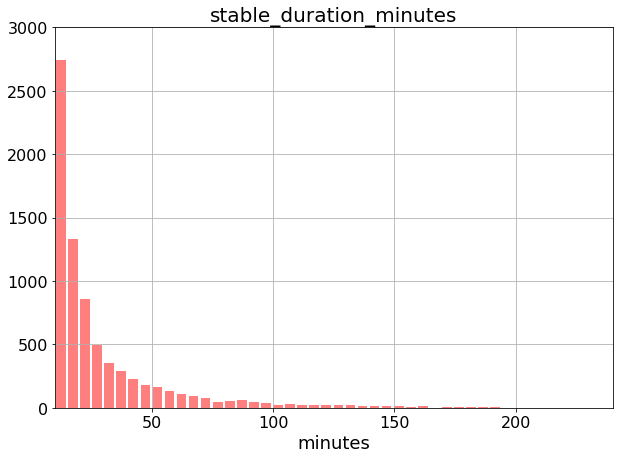

In [135]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "stable_duration_minutes"
upper_limit = 240
lower_limit = 10

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]

# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "minutes",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 44,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 3000,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )


# duration (of flight)

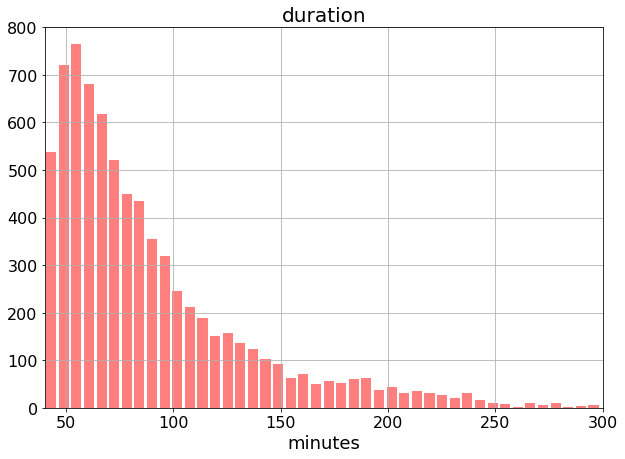

In [153]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "duration"
upper_limit = 300
lower_limit = 40

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit*60 )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit*60 )
df = dataframe[ cond1 & cond2 ][column_name_str]
df = df.divide(60)

# print file_name
#print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "minutes",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 44,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 800,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )

# ff (fuel flow during cruise)

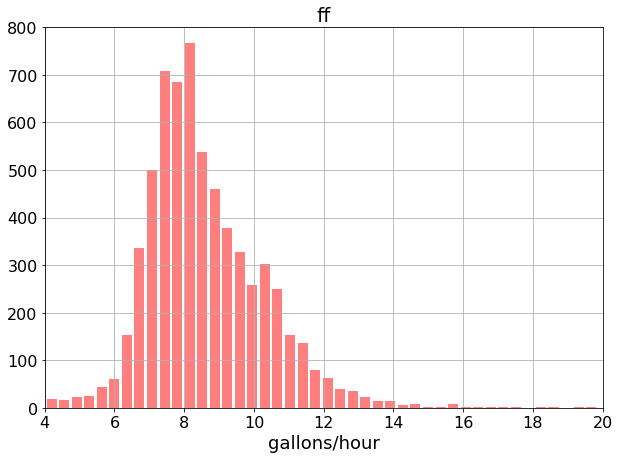

In [163]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "ff"
upper_limit = 20
lower_limit = 4

cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
df = dataframe[ cond1 & cond2 ][column_name_str]

# print file_name
# print df.describe()

histo_chart(
    df,
    chart_title = column_name_str,
    x_axis_label = "gallons/hour",
    y_axis_label = "",
    column_name_str = column_name_str,
    bins = 44,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = lower_limit,
    xlim_upper = upper_limit,
    ylim_lower = 0,
    ylim_upper = 800,
    x_grid_truth = 1,
    y_grid_truth = 1,
                )


## max_cht_series_name_cr (cyl number of hottest cylinder in cruise)

df_198_116.pic
7597


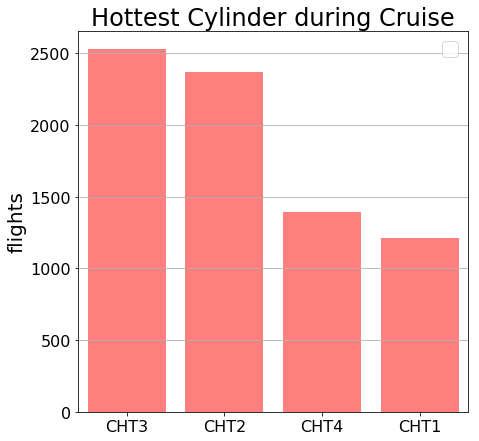

In [181]:
dataframe = flights_dataframe

# fill these in:
column_name_str = "max_cht_series_name_cr"
#upper_limit = 30
#lower_limit = 10

cond1 = 1
cond2 = 1
#cond1 = ( dataframe.loc[:,column_name_str] < upper_limit )
#cond2 = ( dataframe.loc[:,column_name_str] > lower_limit )
#df = dataframe[ cond1 & cond2 ][column_name_str]
df = dataframe[column_name_str]
print file_name
print len(df.index)
valuecounts_df = df.value_counts()
valuecounts_list = valuecounts.tolist()[:4]
#print(valuecounts_df)
#print valuecounts_list  
#print df.describe()
#df.plot(kind='bar')
#plt.xlabel(column_name_str)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("Hottest Cylinder during Cruise", fontsize=24)
ax1.bar([x+.5 for x in range(1,5)], valuecounts_list, color="r", label="", alpha=.5)
#ax1.set_xlabel("", fontsize=20)
ax1.set_ylabel("flights", fontsize=20)
ax1.tick_params(axis='both', labelsize=16)
ax1.set_xlim(1,5)
ax1.set_xticks([x+.5 for x in range(1,5)])
ax1.set_xticklabels(valuecounts.index)
#ax1.set_ylim(min_limit_2, max_limit_2)
ax1.legend(loc=0, fontsize=20)
ax1.yaxis.grid(True)
fig.set_size_inches(7,7)



In [183]:
# df = flights_dataframe.copy()
# print len(df.index)

cond1 = 1
cond2 = 1
#cond1 = ( dataframe.loc[:,"date"] > '2015-03-10' )
#cond2 = ( dataframe.loc[:,"max_cht_cr"] > 390 )
#cond3 = ( dataframe.loc[:,"max_cht_cr"] <  )
#cond2 = ( dataframe.loc[:,"mpg"] < 9 )
#cond3 = ( dataframe.loc[:,"pct_power"] > .8 )
#cond2 = ( dataframe.loc[:,"aircraft_id"] == 6460)
cond3 = 1

#df_recent = df[ cond1 & cond2 & cond3 ][["aircraft_id", "max_cht_cr", "max_cht_temperature", "mpg",
#                                             "lean_status", "pct_power"]]

#df_grouped_recent = df_recent.groupby("aircraft_id")
#df_grouped_recent_mean = df_grouped_recent.aggregate(np.mean)
#df_grouped_recent_mean
#df_grouped_recent.describe()
#df_grouped = df.groupby("aircraft_id")
#df_grouped
#df

## Fuel efficiency (mpg) vs. Percent Power in cruise

In [184]:
dataframe = flights_dataframe.copy()

In [198]:
##### Create two lists for plotting

# fill these in:
column_name_str_1 = "pct_power"
max_limit_1 = .85
min_limit_1 = .6

column_name_str_2 = "mpg"
max_limit_2 = 24
min_limit_2 = 9

column_name_str_3 = "stable_altitude"
max_limit_3 = 8000
min_limit_3 = 8000

column_name_str_4 = "lean_status"
max_limit_4 = "lop"
min_limit_4 = "rop"

cond_1_max = ( dataframe.loc[:,column_name_str_1] < max_limit_1 )
cond_1_min = ( dataframe.loc[:,column_name_str_1] > min_limit_1 )

cond_2_max = ( dataframe.loc[:,column_name_str_2] < max_limit_2 )
cond_2_min = ( dataframe.loc[:,column_name_str_2] > min_limit_2 )

cond_3_low = ( (dataframe.loc[:,column_name_str_3] < min_limit_3) & \
                                      (dataframe.loc[:,column_name_str_3] > 1000) )
cond_3_high = ( dataframe.loc[:,column_name_str_3] >= max_limit_3 )

cond_4_lop = ( dataframe.loc[:,column_name_str_4] == max_limit_4 )
cond_4_rop = ( dataframe.loc[:,column_name_str_4] == min_limit_4 )


df = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]

df_low = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_low ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
df_high = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_high ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
df_high_lop = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_high & cond_4_lop ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
df_high_rop = dataframe[ cond_1_max & cond_1_min & cond_2_max & cond_2_min & cond_3_high & cond_4_rop ]\
        [[column_name_str_1, column_name_str_2, column_name_str_3]]
    
    
pct_power_list_decimal = df[[column_name_str_1]].values.tolist()
pct_power_list = [x[0]*100 for x in pct_power_list_decimal]
mpg_list = df[[column_name_str_2]].values.tolist()
mpg_list = [x[0] for x in mpg_list]

print "number of rows in df =", len(df.index)
print "length of pct_power_list =", len(pct_power_list)
print "length of mpg_list =", len(mpg_list)
#print pct_power_list[100:110]
#print mpg_list[100:110]
# print df.describe()
# print df_high.describe()
# print df_low.describe()

number of rows in df = 3657
length of pct_power_list = 3657
length of mpg_list = 3657


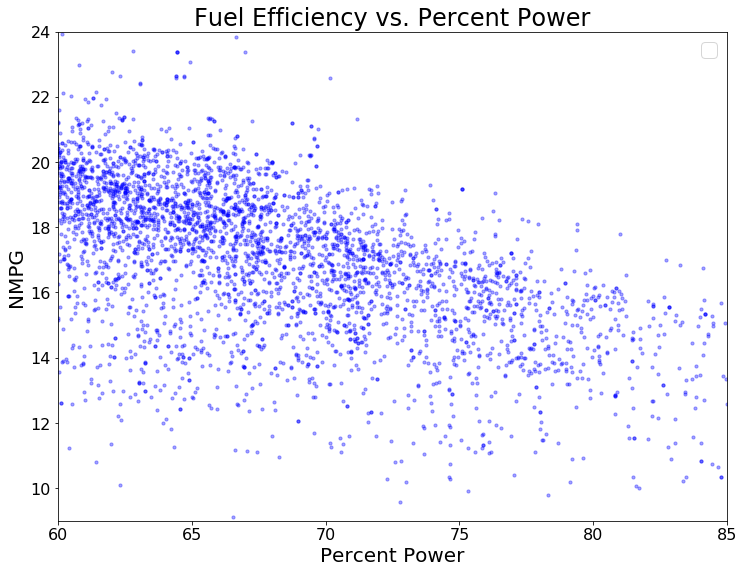

In [199]:
##### Create the chart

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("Fuel Efficiency vs. Percent Power", fontsize=24)
ax1.scatter(pct_power_list, mpg_list, color="b", label="", alpha=.35, s=10)
#ax1.scatter(aircraft_max_cht_cruise_list, aircraft_max_cht_spread_cruise_list, color="r", s=200, edgecolor="b",linewidth=1, label="")
#ax4.bar(bucket_label_list, pct_power_freq_list, color="g", width=.9, label="All")
ax1.set_xlabel("Percent Power", fontsize=20)
ax1.set_ylabel("NMPG", fontsize=20)
ax1.tick_params(axis='both', labelsize=16)
ax1.set_xlim(min_limit_1*100, max_limit_1*100)
ax1.set_ylim(min_limit_2, max_limit_2)
ax1.legend(loc=0, fontsize=20)
fig.set_size_inches(12,9)

## Fuel efficiency (mpg) vs. Percent Power in cruise - high and low altitude

<function seaborn.rcmod.reset_orig>

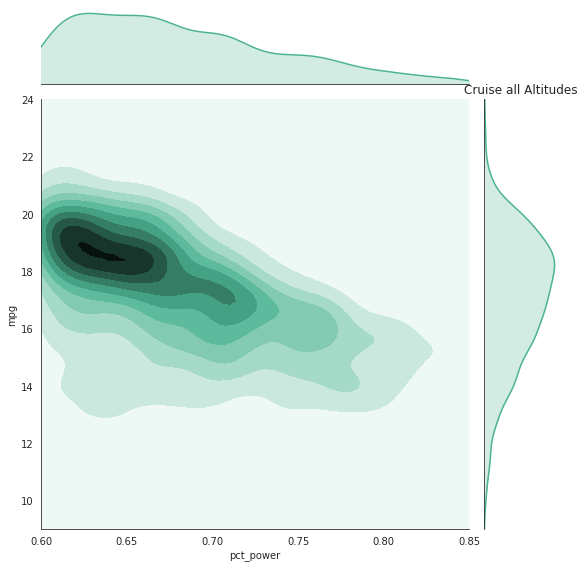

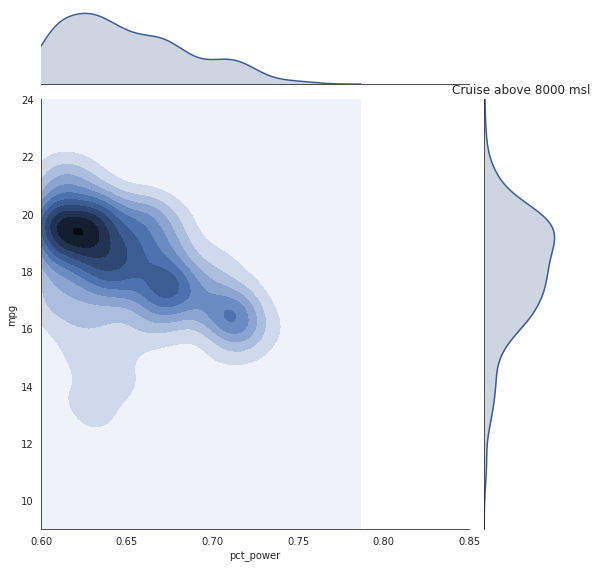

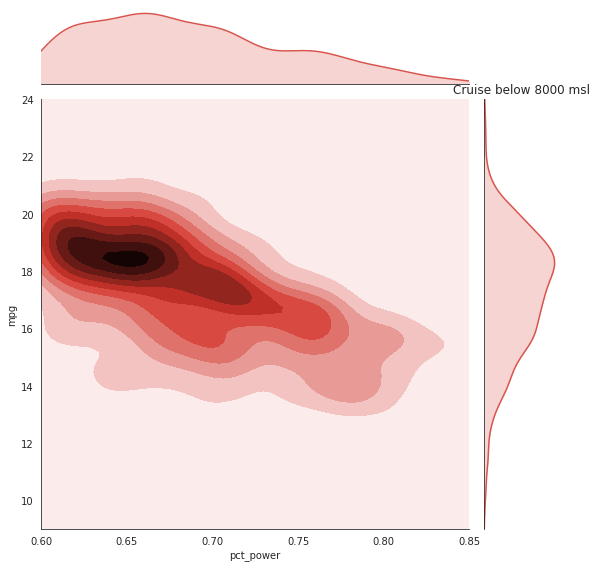

In [212]:


with sns.axes_style("white"):
    ax1 = sns.jointplot("pct_power", "mpg", data=df, kind="kde", color="#4CB391", size=8,
                        xlim=(min_limit_1, max_limit_1), ylim=(min_limit_2, max_limit_2))
    plt.title("Cruise all Altitudes")
    
with sns.axes_style("white"):
    ax1 = sns.jointplot("pct_power", "mpg", data=df_high, kind="kde", color=sns.xkcd_rgb["denim blue"], size=8,
                        xlim=(min_limit_1, max_limit_1), ylim=(min_limit_2, max_limit_2))
    plt.title("Cruise above 8000 msl")
    
with sns.axes_style("white"):
    ax1 = sns.jointplot("pct_power", "mpg", data=df_low, kind="kde", color=sns.xkcd_rgb["pale red"], size=8,
                        xlim=(min_limit_1, max_limit_1), ylim=(min_limit_2, max_limit_2))
    plt.title("Cruise below 8000 msl")
            
sns.reset_orig

____

In [61]:

def histo_chart(
    df,
    chart_title = "",
    x_axis_label = "",
    y_axis_label = "",
    column_name_str = "",
    bins = 20,
    color = 'r',
    alpha = .5,
    rwidth = .8,
    xlim_lower = 0,
    xlim_upper = 500,
    ylim_lower = 0,
    ylim_upper = 750,
    x_grid_truth = 1,
    y_grid_truth = 1,
                ):
    
    plot_list = df.tolist()
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title(chart_title, fontsize=20)
    #xtick_locs = [ x for x in range(len(series)) if x%(60/sample_period_seconds)==0 ]
    #x_labels = [ x*sample_period_seconds for x in range(len(series)) if x%(60/sample_period_seconds)==0 ]
    #ax1.set_xticks(xtick_locs)
    #ax1.set_xticklabels(x_labels, rotation=-90)
    ax1.set_xlabel(x_axis_label, fontsize=18)
    #ax1.set_ylabel(y_label)
    ax1.hist(
        plot_list,
         bins=bins,
         alpha=alpha,
         color=color,                 
         rwidth=rwidth,
         histtype='bar',
         #orientation='horizontal',
        )

    #ax1.axhline(y=mean_of_series, color='r', linestyle='-')
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_xlim(xlim_lower, xlim_upper)
    ax1.set_ylim(ylim_lower, ylim_upper)
    ax1.xaxis.grid(x_grid_truth)
    ax1.yaxis.grid(y_grid_truth)

    fig.set_size_inches(10, 7)
    return